In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.utils import shuffle 
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
df = pd.read_csv("airquality.csv",encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [3]:
Wuri = df['SiteName'].isin(['烏日']) #找烏日測站
df[Wuri].fillna(method='ffill') #填補NA值

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
460322,461617,烏日,臺中市,44.0,懸浮微粒,良好,3.3,0.2,NaN,7,...,48.0,7.0,13.4,NaN,NaN,NaN,NaN,2017/10/12 22:00,NaN,NaN
460407,461702,烏日,臺中市,40.0,懸浮微粒,良好,2.8,0.2,NaN,4,...,43.0,7.0,8.4,NaN,NaN,NaN,NaN,2017/10/12 23:00,NaN,NaN
460442,461737,烏日,臺中市,35.0,懸浮微粒,良好,2.4,0.2,NaN,2,...,38.0,6.0,5.4,NaN,NaN,NaN,NaN,2017/10/13 00:00,NaN,NaN
460513,461808,烏日,臺中市,35.0,懸浮微粒,良好,2.4,0.2,NaN,2,...,38.0,6.0,5.4,NaN,NaN,NaN,NaN,2017/10/13 01:00,NaN,NaN
460602,461897,烏日,臺中市,0.0,懸浮微粒,良好,0.0,0,NaN,0,...,0.0,0.0,5.4,NaN,NaN,NaN,NaN,2017/10/13 02:00,NaN,NaN
460770,462065,烏日,臺中市,0.0,懸浮微粒,良好,0.0,0,NaN,0,...,0.0,0.0,5.4,NaN,NaN,NaN,NaN,2017/10/13 03:00,NaN,NaN
460852,462147,烏日,臺中市,0.0,懸浮微粒,良好,0.0,0,NaN,0,...,0.0,0.0,5.4,NaN,NaN,NaN,NaN,2017/10/13 04:00,NaN,NaN
461172,462467,烏日,臺中市,28.0,懸浮微粒,良好,2.3,0.1,NaN,6,...,30.0,6.0,7.2,NaN,NaN,NaN,NaN,2017/10/13 08:00,NaN,NaN
461261,462556,烏日,臺中市,28.0,懸浮微粒,良好,2.5,0.1,NaN,7,...,30.0,6.0,9.6,NaN,NaN,NaN,NaN,2017/10/13 09:00,NaN,NaN
461369,462664,烏日,臺中市,32.0,懸浮微粒,良好,2.7,0.1,NaN,9,...,35.0,5.0,6.6,NaN,NaN,NaN,NaN,2017/10/13 10:00,NaN,NaN


In [4]:
Wuri = df['SiteName'].isin(['烏日']) #找烏日測站
Wuri=df[Wuri].drop(columns=['O3','SiteName','AQI','id','Country','Pollutant','Status','CO_8hr','O3_8hr','NOx','WindSpeed','WindDirec','PublishTime','PM10_AVG','PM25_AVG','NO']).reset_index(drop=True)
#只留下SiteName PM25 column


Wuri

,SO2,CO,PM10,PM25,NO2
0,3.3,0.2,48.0,7.0,13.4
1,2.8,0.2,43.0,7.0,8.4
2,2.4,0.2,38.0,6.0,5.4
3,2.4,0.2,38.0,6.0,5.4
4,0.0,0,0.0,0.0,5.4
5,0.0,0,0.0,0.0,5.4
6,0.0,0,0.0,0.0,5.4
7,2.3,0.1,30.0,6.0,7.2
8,2.5,0.1,30.0,6.0,9.6
9,2.7,0.1,35.0,5.0,6.6


In [5]:
cd4 = Wuri['CO'].isin([0])
Wuri[cd4] #輸出整筆資料

,SO2,CO,PM10,PM25,NO2
4,0.0,0,0.0,0.0,5.4
5,0.0,0,0.0,0.0,5.4
6,0.0,0,0.0,0.0,5.4
279,0.0,0,0.0,0.0,13.8
280,0.0,0,0.0,0.0,13.8
281,0.0,0,0.0,0.0,13.8
282,0.0,0,0.0,0.0,13.8
283,0.0,0,0.0,0.0,13.8
284,0.0,0,0.0,0.0,13.8
285,0.0,0,0.0,0.0,13.8


In [6]:
Wuri.replace({0:np.nan,0.0:np.nan}, inplace=True) #將0全部改為空值
Wuri['SO2'].replace({81.4:np.nan,50.1:np.nan}, inplace=True)
Wuri['CO'].replace({2.24:np.nan}, inplace=True)
Wuri

,SO2,CO,PM10,PM25,NO2
0,3.3,0.20,48.0,7.0,13.4
1,2.8,0.20,43.0,7.0,8.4
2,2.4,0.20,38.0,6.0,5.4
3,2.4,0.20,38.0,6.0,5.4
4,NaN,NaN,NaN,NaN,5.4
5,NaN,NaN,NaN,NaN,5.4
6,NaN,NaN,NaN,NaN,5.4
7,2.3,0.10,30.0,6.0,7.2
8,2.5,0.10,30.0,6.0,9.6
9,2.7,0.10,35.0,5.0,6.6


In [7]:
Wuri.fillna(method='ffill', inplace=True) #以前面數字來取代0值


Wuri

,SO2,CO,PM10,PM25,NO2
0,3.3,0.20,48.0,7.0,13.4
1,2.8,0.20,43.0,7.0,8.4
2,2.4,0.20,38.0,6.0,5.4
3,2.4,0.20,38.0,6.0,5.4
4,2.4,0.20,38.0,6.0,5.4
5,2.4,0.20,38.0,6.0,5.4
6,2.4,0.20,38.0,6.0,5.4
7,2.3,0.10,30.0,6.0,7.2
8,2.5,0.10,30.0,6.0,9.6
9,2.7,0.10,35.0,5.0,6.6


In [8]:
cd4 = Wuri['PM25'].isin([0])
Wuri[cd4] #輸出整筆資料

,SO2,CO,PM10,PM25,NO2


In [9]:
Wuri['pr']=''
Wuri.drop([0, 1],inplace=True)
Wuri.reset_index(drop=True,inplace=True)


Wuri.to_csv('Wuripollution.csv')

Wuri

,SO2,CO,PM10,PM25,NO2,pr
0,2.4,0.20,38.0,6.0,5.4,
1,2.4,0.20,38.0,6.0,5.4,
2,2.4,0.20,38.0,6.0,5.4,
3,2.4,0.20,38.0,6.0,5.4,
4,2.4,0.20,38.0,6.0,5.4,
5,2.3,0.10,30.0,6.0,7.2,
6,2.5,0.10,30.0,6.0,9.6,
7,2.7,0.10,35.0,5.0,6.6,
8,3.0,0.10,39.0,5.0,7.2,
9,2.9,0.10,44.0,5.0,7.7,


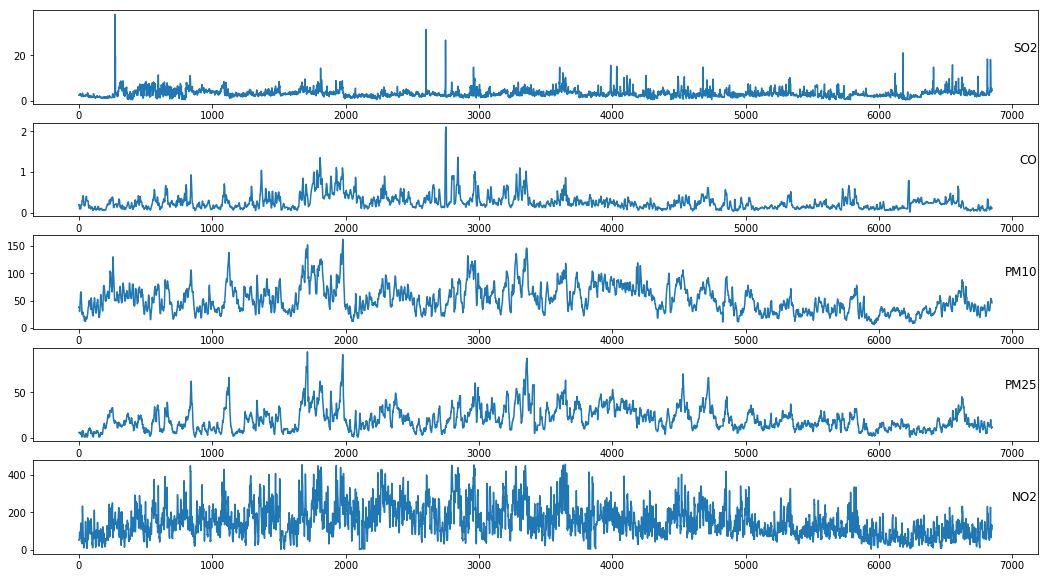

In [10]:
# load dataset
dataset =pd.read_csv('Wuripollution.csv',header=0,index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1,2, 3, 4]
i=1
plt.figure(figsize=(18,10)) 
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [11]:
dataset

,SO2,CO,PM10,PM25,NO2,pr
0,2.4,0.20,38.0,6.0,51.0,NaN
1,2.4,0.20,38.0,6.0,51.0,NaN
2,2.4,0.20,38.0,6.0,51.0,NaN
3,2.4,0.20,38.0,6.0,51.0,NaN
4,2.4,0.20,38.0,6.0,51.0,NaN
5,2.3,0.10,30.0,6.0,69.0,NaN
6,2.5,0.10,30.0,6.0,93.0,NaN
7,2.7,0.10,35.0,5.0,63.0,NaN
8,3.0,0.10,39.0,5.0,69.0,NaN
9,2.9,0.10,44.0,5.0,74.0,NaN


In [12]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr']=dataset['PM25']

train_set_scaled

/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,SO2,CO,PM10,PM25,NO2,pr
0,-0.445335,-0.358999,-0.588797,-1.148698,-1.184208,6.0
1,-0.445335,-0.358999,-0.588797,-1.148698,-1.184208,6.0
2,-0.445335,-0.358999,-0.588797,-1.148698,-1.184208,6.0
3,-0.445335,-0.358999,-0.588797,-1.148698,-1.184208,6.0
4,-0.445335,-0.358999,-0.588797,-1.148698,-1.184208,6.0
5,-0.501810,-0.899879,-0.908641,-1.148698,-0.970855,6.0
6,-0.388860,-0.899879,-0.908641,-1.148698,-0.686384,6.0
7,-0.275910,-0.899879,-0.708739,-1.226572,-1.041973,5.0
8,-0.106485,-0.899879,-0.548817,-1.226572,-0.970855,5.0
9,-0.162960,-0.899879,-0.348914,-1.226572,-0.911590,5.0


In [13]:
def train_window(df,ref_hr=66,pr_hr=6):
    X_train,Y_train=[],[]
    for i in range(df.shape[0]-pr_hr-ref_hr): 
        X_train.append(np.array(df.iloc[i:i+ref_hr,:-1])) 
        Y_train.append(np.array(df.iloc[i+ref_hr:i+ref_hr+pr_hr]["pr"]))
#        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
        #选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]] 
        #"，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。 
        #需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train) 




In [14]:
#將次序打亂 資料亂序 將資料打散，而非照日期排序
#https://blog.csdn.net/hustqb/article/details/78077802
#def shuffle(X,Y):
#np.random.seed(10)
#randomList = np.arange(X.shape[0])
#np.random.shuffle(randomList)
#return X[randomList], Y[randomList]

In [15]:
# Training data & Validation data
# 將Training Data取一部份當作Validation Data


def splitData(X, Y, rate):
    X_train = X[int(X.shape[0] * rate):]
    Y_train = Y[int(Y.shape[0] * rate):]
    X_val = X[:int(X.shape[0] * rate)]
    Y_val = Y[:int(Y.shape[0] * rate)]
    return X_train, Y_train, X_val, Y_val

In [16]:
# 合併輸出

# build Data, use last 23 hours to predict next 1 hours
X_train, Y_train = train_window(train_set_scaled, 12, 7)

# shuffle the data, and random seed is 10
#X_train, Y_train = shuffle(X_train, Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

# from 2 dimmension to 3 dimension
#Y_train = Y_train[:,:,np.newaxis]
#Y_val = Y_val[:,:,np.newaxis]

In [17]:
X_train.shape

(6147, 12, 5)

/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(32, input_shape=(12, 5))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                4864      
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 455       
__________

5532/5532 [==============================] - 0s 43us/step - loss: 49.6949 - val_loss: 14.9292
Epoch 65/200
5532/5532 [==============================] - 0s 50us/step - loss: 48.1718 - val_loss: 14.6611
Epoch 66/200
5532/5532 [==============================] - 0s 52us/step - loss: 49.8950 - val_loss: 14.8248
Epoch 67/200
5532/5532 [==============================] - 0s 48us/step - loss: 50.2555 - val_loss: 14.5880
Epoch 68/200
5532/5532 [==============================] - 0s 50us/step - loss: 50.3441 - val_loss: 14.6913
Epoch 69/200
5532/5532 [==============================] - 0s 47us/step - loss: 48.5855 - val_loss: 14.6067
Epoch 70/200
5532/5532 [==============================] - 0s 49us/step - loss: 46.6519 - val_loss: 14.6350
Epoch 71/200
5532/5532 [==============================] - 0s 49us/step - loss: 46.6626 - val_loss: 14.8558
Epoch 72/200
5532/5532 [==============================] - 0s 44us/step - loss: 47.8848 - val_loss: 14.5927
Epoch 73/200
5532/5532 [==========================

5532/5532 [==============================] - 0s 52us/step - loss: 40.5152 - val_loss: 16.0827
Epoch 141/200
5532/5532 [==============================] - 0s 52us/step - loss: 42.1695 - val_loss: 16.3854
Epoch 142/200
5532/5532 [==============================] - 0s 54us/step - loss: 40.7787 - val_loss: 15.9650
Epoch 143/200
5532/5532 [==============================] - 0s 50us/step - loss: 42.2995 - val_loss: 16.3270
Epoch 144/200
5532/5532 [==============================] - 0s 49us/step - loss: 42.1613 - val_loss: 16.0643
Epoch 145/200
5532/5532 [==============================] - 0s 48us/step - loss: 41.4825 - val_loss: 16.2390
Epoch 146/200
5532/5532 [==============================] - 0s 61us/step - loss: 41.3983 - val_loss: 16.1740
Epoch 147/200
5532/5532 [==============================] - 0s 53us/step - loss: 40.9363 - val_loss: 15.6650
Epoch 148/200
5532/5532 [==============================] - 0s 50us/step - loss: 40.5918 - val_loss: 16.5987
Epoch 149/200
5532/5532 [=================

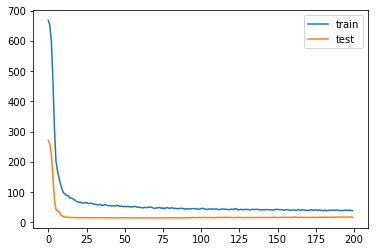

In [20]:
from keras.layers import Dropout


def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(32,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model = buildManyToOneModel(X_train.shape)

history=model.fit(X_train, Y_train, epochs=200, batch_size=300, validation_split= 0.1)


# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model
model.save('Wurimodel.h5')
del model

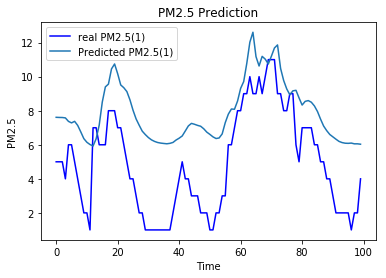

Train 0.43826256710590533
Validation 0.37920937042459735
4789933750251369.0
The R2 score on the Test set is:	0.788
Train Score: 4.47 RMSE
Test Score: 3.96 RMSE
The MSE   on the Test set is: 15.710642551524424
The RMSE  on the Test set is: 3.9636652925700506
The MAE   on the Test set is: 3.0109090588626892
The MAPE  on the Test set is: 0.07085700811573921
The SMAPE on the Test set is: 0.04161096940047933


In [21]:
#讀取model
model = load_model('Wurimodel.h5')
# 預測
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.plot(Y_val[0:100,0], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:100,0], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)
# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用

